In [1]:
import requests

LEN_ALL_JOB_PAGE = 15
LEN_WFH_JOB_PAGE = 12
page = 1
url_get_all = requests.get(f'https://www.kalibrr.id/id-ID/job-board/te/data/{page}')
url_get_wfh = requests.get(f'https://www.kalibrr.id/id-ID/job-board/te/data/work_from_home/y/{page}')

In [2]:
from bs4 import BeautifulSoup

soup_all = BeautifulSoup(url_get_all.content, "html.parser")

In [3]:
print(soup_all.prettify()[0:500])

<!DOCTYPE html>
<html lang="id-ID">
 <head>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <script type="application/ld+json">
   {
    "@context": "https://schema.org",
    "@type": "WebSite",
    "url": "https://www.kalibrr.com",
    "potentialAction": [
      {
        "@type": "SearchAction",
        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",
        "query-input": "required name=search_term_string"
      }
     ]
  }
  </scrip


### CONTAINER

In [4]:
containers = soup_all.find_all("div", class_="css-1b4vug6")[0]

In [5]:
containers.find("a", class_="k-text-primary-color").text.strip()

'DevOps and Data Engineer'

In [6]:
containers.find_all("a", class_="k-text-subdued")[2].text.strip().split(", ")[0]

'Tangerang Selatan'

In [7]:
containers.find("div", class_="k-col-start-5 k-row-start-1 k-text-right k-text-xs k-text-subdued k-hidden k-mb-2 md:k-block").find_all("span")[0].text.strip()

'Posted 9 days ago • Apply before 13 May'

In [8]:
containers.find("div", class_="k-col-start-5 k-row-start-1 k-text-right k-text-xs k-text-subdued k-hidden k-mb-2 md:k-block").find_all("span")[0].text.strip().split(" • ")[0]

'Posted 9 days ago'

In [9]:
from datetime import datetime, timedelta

def convert_date(date_string):

    if 'day' in date_string:
        if date_string.startswith('Posted a'):
            delta = timedelta(days=1)
        else:
            days_ago = int(date_string.split()[1])
            delta = timedelta(days=days_ago)
        date = datetime.now() - delta
        
    elif 'minute' in date_string:
        date = datetime.now()

    elif 'hour' in date_string:
        if date_string.startswith('Posted an'):
            delta = timedelta(hours=1)
        else:
            hours_ago = int(date_string.split()[1])
            delta = timedelta(hours=hours_ago)
        date = datetime.now() - delta

    elif 'month' in date_string:
        if date_string.startswith('Posted a'):
            months_ago = 1
        else:
            months_ago = int(date_string.split()[1])
        current_month = datetime.now().month
        current_year = datetime.now().year
        target_month = current_month - months_ago
        if target_month <= 0:
            target_month += 12
            current_year -= 1
        date = datetime(current_year, target_month, 1)\

    elif 'Apply before' in date_string:
        date_components = date_string.split()
        day = int(date_components[2])
        month = datetime.strptime(date_components[3], "%b").month
        year = datetime.now().year
        date = datetime(year, month, day)
        formatted_date = date.strftime("%d/%m/%Y")

    else:
        return None

    return date.strftime("%d/%m/%Y")

# Make Dataset

### ALL JOB

In [10]:
all_jobs = []

for page in range(1, 31):
    url = f"https://www.kalibrr.id/id-ID/job-board/te/data/{page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    containers = soup.find_all("div", class_="css-1b4vug6")
    for cont in containers:
        job = {}
        # ambil title pekerjaan
        job["Title"] = cont.find("a", class_="k-text-primary-color").text.strip()
        # ambil nama perusahaan
        job["Company"] = cont.find_all("a", class_="k-text-subdued")[1].text.strip()
        # ambil lokasi pekerjaan
        job["Kota"] = cont.find_all("a", class_="k-text-subdued")[2].text.strip().split(", ")[0]
        job["Negara"] = cont.find_all("a", class_="k-text-subdued")[2].text.strip().split(", ")[1]
        # ambil tanggal post
        job["Posted"] = convert_date(cont.find("div", class_="k-col-start-5 k-row-start-1 k-text-right k-text-xs k-text-subdued k-hidden k-mb-2 md:k-block").find_all("span")[0].text.strip().split(" • ")[0])
        job["Deadline"] = convert_date(cont.find("div", class_="k-col-start-5 k-row-start-1 k-text-right k-text-xs k-text-subdued k-hidden k-mb-2 md:k-block").find_all("span")[0].text.strip().split(" • ")[1])
        all_jobs.append(job)


In [11]:
import pandas as pd

df_all_job = pd.DataFrame(all_jobs)

In [12]:
df_all_job.duplicated().sum()

102

In [13]:
df_all_job.drop_duplicates(inplace=True)

In [14]:
df_all_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 449
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     348 non-null    object
 1   Company   348 non-null    object
 2   Kota      348 non-null    object
 3   Negara    348 non-null    object
 4   Posted    346 non-null    object
 5   Deadline  348 non-null    object
dtypes: object(6)
memory usage: 19.0+ KB


### WFH

In [15]:
all_wfh = []

for page in range(1, 16):
    url = f"https://www.kalibrr.id/id-ID/job-board/te/data/work_from_home/y/{page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    containers = soup.find_all("div", class_="css-1b4vug6")
    for cont in containers:
        job = {}
        # ambil title pekerjaan
        job["Title"] = cont.find("a", class_="k-text-primary-color").text.strip()
        # ambil nama perusahaan
        job["Company"] = cont.find_all("a", class_="k-text-subdued")[1].text.strip()
        # ambil lokasi pekerjaan
        job["Kota"] = cont.find_all("a", class_="k-text-subdued")[2].text.strip().split(", ")[0]
        job["Negara"] = cont.find_all("a", class_="k-text-subdued")[2].text.strip().split(", ")[1]
        # ambil tanggal post
        job["Posted"] = convert_date(cont.find("div", class_="k-col-start-5 k-row-start-1 k-text-right k-text-xs k-text-subdued k-hidden k-mb-2 md:k-block").find_all("span")[0].text.strip().split(" • ")[0])
        job["Deadline"] = convert_date(cont.find("div", class_="k-col-start-5 k-row-start-1 k-text-right k-text-xs k-text-subdued k-hidden k-mb-2 md:k-block").find_all("span")[0].text.strip().split(" • ")[1])
        all_wfh.append(job)


In [16]:
import pandas as pd

df_all_wfh = pd.DataFrame(all_wfh)

In [17]:
df_all_wfh.duplicated().sum()

4

In [18]:
df_all_job.drop_duplicates(inplace=True)

In [19]:
df_all_wfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     222 non-null    object
 1   Company   222 non-null    object
 2   Kota      222 non-null    object
 3   Negara    222 non-null    object
 4   Posted    220 non-null    object
 5   Deadline  222 non-null    object
dtypes: object(6)
memory usage: 10.5+ KB


## Data Concatenated

In [20]:
df_concatenated = pd.concat([df_all_job, df_all_wfh], ignore_index=True)

In [21]:
df_concatenated.duplicated().sum()

62

In [22]:
df_concatenated["WFH"] = df_concatenated.apply(lambda row: 'Yes' if row.tolist() in df_all_wfh.values.tolist() else 'No', axis=1)

In [23]:
df_concatenated.head()

,Title,Company,Kota,Negara,Posted,Deadline,WFH
0,DevOps and Data Engineer,Mobius Digital,Tangerang Selatan,Indonesia,04/04/2023,13/05/2023,Yes
1,Data Quality Analyst,Astra Financial,Central Jakarta City,Indonesia,03/04/2023,01/05/2023,Yes
2,Project Manager,PGI Data,Jakarta,Indonesia,03/04/2023,29/06/2023,No
3,Business Development (B2B Corporate Sales),Algoritma,Jakarta,Indonesia,31/03/2023,30/05/2023,No
4,Data Scientist,MileApp,West Jakarta,Indonesia,01/03/2023,08/05/2023,Yes


In [24]:
df_concatenated.duplicated().sum()

62

In [25]:
df_concatenated.drop_duplicates(inplace=True)

In [26]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     508 non-null    object
 1   Company   508 non-null    object
 2   Kota      508 non-null    object
 3   Negara    508 non-null    object
 4   Posted    506 non-null    object
 5   Deadline  508 non-null    object
 6   WFH       508 non-null    object
dtypes: object(7)
memory usage: 31.8+ KB


### Drop Missing Value
dilakukan penghapusan karna posted sudah setahun yang lalu

In [27]:
df_concatenated[df_concatenated['Posted'].isna() == True]

,Title,Company,Kota,Negara,Posted,Deadline,WFH
280,Freelance Backend Engineer,Kompas Gramedia,West Jakarta,Indonesia,None,20/04/2023,Yes
281,Freelance Frontend Engineer,Kompas Gramedia,West Jakarta,Indonesia,None,20/04/2023,Yes


In [28]:
df_concatenated = df_concatenated.dropna()

In [29]:
df_concatenated['Posted'] = pd.to_datetime(df_concatenated['Posted'])
df_concatenated['Deadline'] = pd.to_datetime(df_concatenated['Deadline'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18692\3915659784.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_concatenated['Posted'] = pd.to_datetime(df_concatenated['Posted'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18692\3915659784.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_concatenated['Deadline'] = pd.to_datetime(df_concatenated['Deadline'])


In [30]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     506 non-null    object        
 1   Company   506 non-null    object        
 2   Kota      506 non-null    object        
 3   Negara    506 non-null    object        
 4   Posted    506 non-null    datetime64[ns]
 5   Deadline  506 non-null    datetime64[ns]
 6   WFH       506 non-null    object        
dtypes: datetime64[ns](2), object(5)
memory usage: 31.6+ KB


In [31]:
df_concatenated.to_csv("./data_input/dataset_kalibrr.csv", index=False)

# Analisis Data

Membuat dataframe yang berisikan data pekerjaan yang baru-baru ini dibuka

In [32]:
df_ws = pd.read_csv("./data_input/dataset_kalibrr.csv")

In [33]:
df_ws['Posted'] = pd.to_datetime(df_ws['Posted'])
df_ws['Deadline'] = pd.to_datetime(df_ws['Deadline'])

In [34]:
selected_w = "No"
wf = lambda x: "WFH" if x == "Yes" else "WFO"

In [35]:
df_wf = df_ws.loc[df_ws['WFH'] == selected_w]

In [36]:
from datetime import datetime, timedelta

today = datetime.today()

one_week_ago = today - timedelta(days=7)
new_jobs_df = df_wf[df_wf['Posted'] >= one_week_ago]

new_jobs = new_jobs_df['Title'].count()
print(f"Total Pekerjaan yang baru dibuka satu minggu ini: {new_jobs}")

Total Pekerjaan yang baru dibuka satu minggu ini: 87


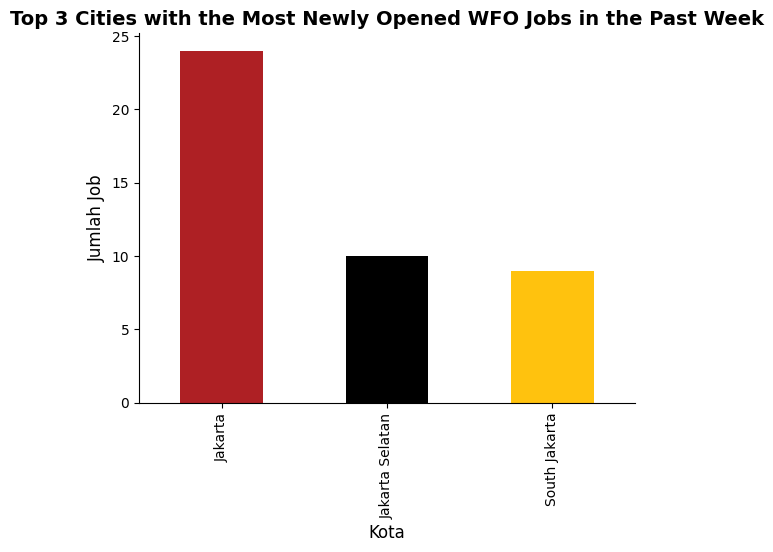

In [37]:
import matplotlib.pyplot as plt

top_kota = new_jobs_df['Kota'].value_counts().head(3)
top_kota.plot(kind='bar', color=['#AE2024', '#000000', '#FFC20E'])
plt.title(f'Top 3 Cities with the Most Newly Opened {wf(selected_w)} Jobs in the Past Week', fontsize=14, fontweight='bold')
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Job', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [38]:
top_cities = new_jobs_df['Kota'].value_counts().head()
print(f'{top_cities.index[0]} Sebanyak : {top_cities[0]}')

Jakarta Sebanyak : 24


In [39]:
company = new_jobs_df.groupby('Company').size().reset_index(name='Job Count')

In [40]:
company = company.sort_values('Job Count', ascending=False)
top_company = company.iloc[0]
print(f'{top_company[0]} Sebanyak : {top_company[1]}')

Great Giant Foods Sebanyak : 26


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18692\3475569713.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(company['Company'][:3], company['Job Count'][:3], color=['#AE2024', '#000000', '#FFC20E'])


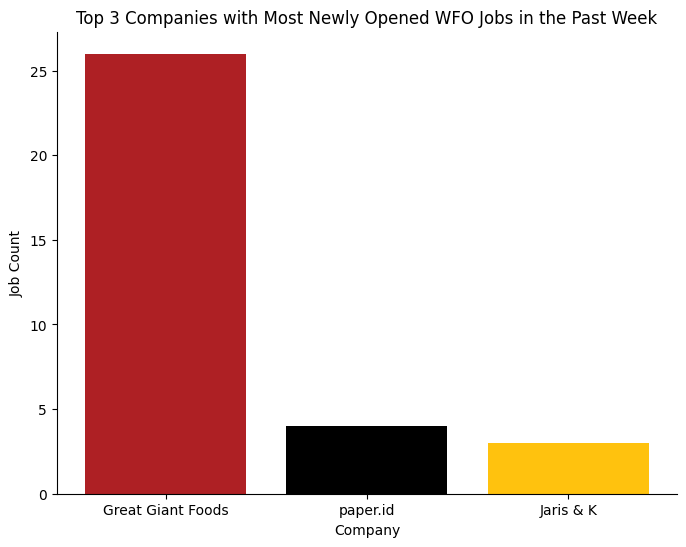

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(company['Company'][:3], company['Job Count'][:3], color=['#AE2024', '#000000', '#FFC20E'])
ax.set_title(f'Top 3 Companies with Most Newly Opened {wf(selected_w)} Jobs in the Past Week')
ax.set_xlabel('Company')
ax.set_ylabel('Job Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [42]:
# VOICE MESSAGE

plot_text = f'In the past week, there were a total of {new_jobs} new job openings {wf(selected_w)} positions. The city with the highest number of job openings is {top_cities.index[0]}, with {top_cities[0]} openings. The company that posted the most job openings is {top_company[0]}, with a total of {top_company[1]} openings.'

print(plot_text)

In the past week, there were a total of 87 new job openings WFO positions. The city with the highest number of job openings is Jakarta, with 24 openings. The company that posted the most job openings is Great Giant Foods, with a total of 26 openings.


In [43]:
import gtts

speech = gtts.gTTS(text = plot_text)
speech.save('output/plot_info_ws.ogg')

In [44]:
from IPython.display import Audio
Audio('output/plot_info_ws.ogg')

NameError: name 'os' is not defined

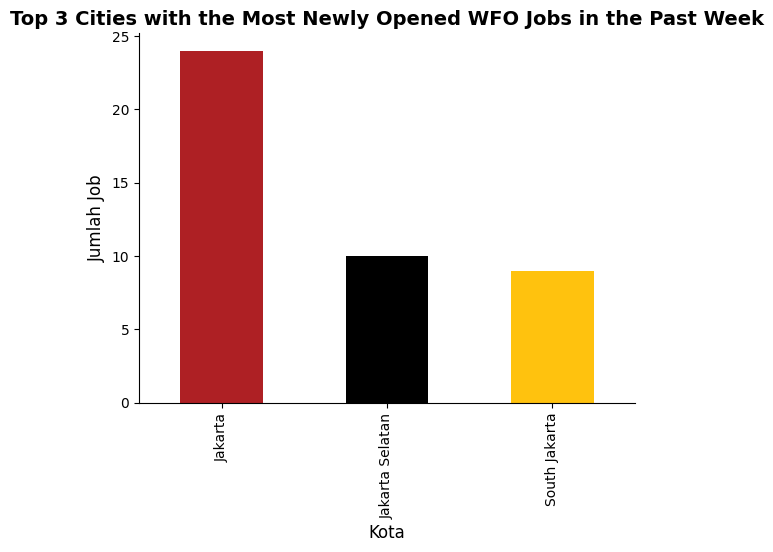

In [45]:
if selected_w in ["No", "Yes"]:
        # TO DO: find the range date
        wf = lambda x: "WFH" if x == "Yes" else "WFO"
        df_wf = df_ws.loc[df_ws['WFH'] == selected_w]

        today = datetime.today()

        one_week_ago = today - timedelta(days=7)
        new_jobs_df = df_wf[df_wf['Posted'] >= one_week_ago]

        new_jobs = new_jobs_df['Title'].count()

        # Cities
        top_kota = new_jobs_df['Kota'].value_counts().head(3)
        top_kota.plot(kind='bar', color=['#AE2024', '#000000', '#FFC20E'])
        plt.title(f'Top 3 Cities with the Most Newly Opened {wf(selected_w)} Jobs in the Past Week', fontsize=14, fontweight='bold')
        plt.xlabel('Kota', fontsize=12)
        plt.ylabel('Jumlah Job', fontsize=12)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        # create output folder
        if not os.path.exists('output'):
            os.makedirs('output')

        # save plot
        plt.savefig('output/plot_ws_1.png', bbox_inches='tight')

        # Companies
        company = new_jobs_df.groupby('Company').size().reset_index(name='Job Count')

        company = company.sort_values('Job Count', ascending=False)
        top_company = company.iloc[0]
        print(f'{top_company[0]} Sebanyak : {top_company[1]}')

        fig, ax = plt.subplots(figsize=(8,6))
        ax.bar(company['Company'][:3], company['Job Count'][:3], color=['#AE2024', '#000000', '#FFC20E'])
        ax.set_title(f'Top 3 Companies with Most Newly Opened {wf(selected_w)} Jobs in the Past Week')
        ax.set_xlabel('Company')
        ax.set_ylabel('Job Count')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        # create output folder
        if not os.path.exists('output'):
            os.makedirs('output')

        # save plot
        plt.savefig('output/plot_ws_2.png', bbox_inches='tight')

        plot_text = f'In the past week, there were a total of {new_jobs} new job openings {wf(selected_w)} positions. The city with the highest number of job openings is {top_cities.index[0]}, with {top_cities[0]} openings. The company that posted the most job openings is {top_company[0]}, with a total of {top_company[1]} openings.'

        speech = gTTS(text = plot_text)
        speech.save('output/plot_info_ws.ogg')